In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1077 1077 462 462


# K Nearest Neighbours Classifier

Best parameters set found on development set:
 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

 Best Score 0.7555988245700423

 Grid scores on development set:
0.723 (+/-0.016) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.717 (+/-0.018) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.740 (+/-0.018) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.737 (+/-0.017) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.737 (+/-0.017) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.735 (+/-0.015) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.729 (+/-0.015) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.734 (+/-0.022) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.742 (+/-0.020) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.731 (+/-0.023) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.738 (+/-0.016) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.727 (+/-0.021) for {'n_neighbors': 4, 'p': 3, 'weights': 'dis

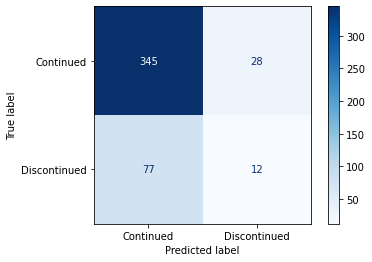

In [3]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]
#p = 1 (manhattan_distance)
#p = 2 (euclidean_distance)
#p = 3 (minkowski_distance)
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With SMOTE Oversampling

In [4]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

 Best Score 0.8535353323179253

 Grid scores on development set:
0.827 (+/-0.022) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.842 (+/-0.019) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.793 (+/-0.027) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.812 (+/-0.023) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.779 (+/-0.025) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.795 (+/-0.022) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.834 (+/-0.018) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.854 (+/-0.020) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.799 (+/-0.024) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.818 (+/-0.017) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.783 (+/-0.028) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.802 (+/-0.020) for {'n_neighbors': 4, 'p': 3, 'weights': 'di


Training Score:  1.0


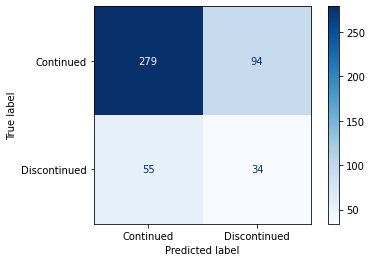

In [5]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With Borderline-SMOTE Oversampling

In [6]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

 Best Score 0.8632176541719374

 Grid scores on development set:
0.843 (+/-0.015) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.855 (+/-0.015) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.816 (+/-0.021) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.827 (+/-0.017) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.808 (+/-0.023) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.818 (+/-0.018) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.847 (+/-0.026) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.863 (+/-0.012) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.821 (+/-0.027) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.834 (+/-0.016) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.820 (+/-0.032) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.829 (+/-0.015) for {'n_neighbors': 4, 'p': 3, 'weights': 'di

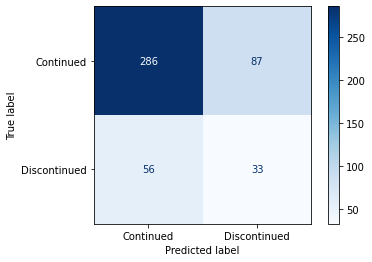

In [7]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With ADASYN Oversampling

In [8]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1686 1686 462 462


Best parameters set found on development set:
 {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

 Best Score 0.876400088130642

 Grid scores on development set:
0.832 (+/-0.021) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.876 (+/-0.014) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.814 (+/-0.028) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.844 (+/-0.017) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.815 (+/-0.030) for {'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}
0.834 (+/-0.027) for {'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
0.824 (+/-0.024) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.845 (+/-0.016) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.778 (+/-0.021) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.798 (+/-0.020) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.758 (+/-0.027) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.781 (+/-0.026) for {'n_neighbors': 3, 'p': 3, 'weights': 'dis

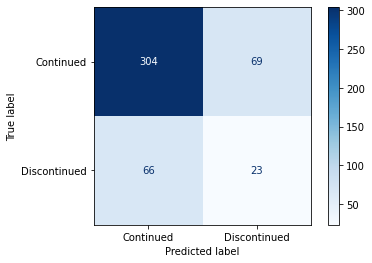

In [9]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(2,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)